**911 Calls Capstone Project**
For this capstone project I have analyzed some 911 call data from Kaggle. 
The data contains the following fields:

lat : String variable, Latitude
lng: String variable, Longitude
desc: String variable, Description of the Emergency Call
zip: String variable, Zipcode
title: String variable, Title
timeStamp: String variable, YYYY-MM-DD HH:MM:SS
twp: String variable, Township
addr: String variable, Address
e: String variable, Dummy variable (always 1)

**Data and Setup**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading data into dataframe**

In [6]:
df = pd.read_csv('E:/2.PYTHON-ML-BOOTCAMP/resources/10-Data-Capstone-Projects/911.csv')

**Checking the data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [8]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**Top 5 zipcodes for 911 calls**

In [9]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**Top 5 townships (twp) for 911 calls**

In [10]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Unique title codes**

In [11]:
df['title'].nunique()

110

**Creating new features**

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. I have used .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

In [12]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


**The most common Reason for a 911 call based off of this new column**

In [13]:
df['reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

**Using seaborn to create a countplot of 911 calls by Reason**

<AxesSubplot:xlabel='reason', ylabel='count'>

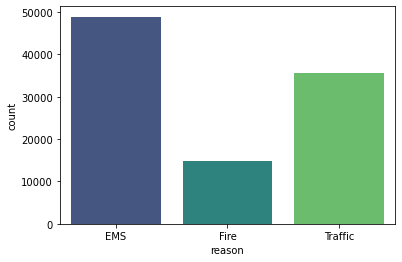

In [15]:
sns.countplot(x='reason', data=df, palette= 'viridis')

In [16]:
type(df['timeStamp'][0])

str

**Converting the column 'timeStamp' from strings to DateTime objects**

In [17]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
time = df['timeStamp'].iloc[0]
time.hour

17

**Using .apply() to create 3 new columns called Hour, Month, and Day of Week.**

In [18]:
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [19]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day of week'] = df['day of week'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


**Using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column**

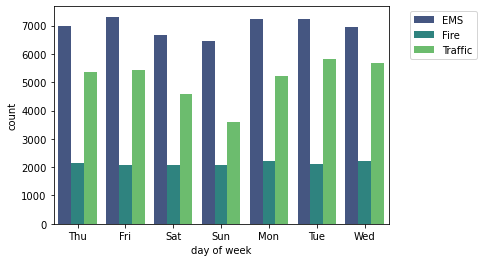

In [20]:
sns.countplot(x='day of week', data =df, hue='reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)  #to relocate the legend outside the box

**Creating countplot for Month.**

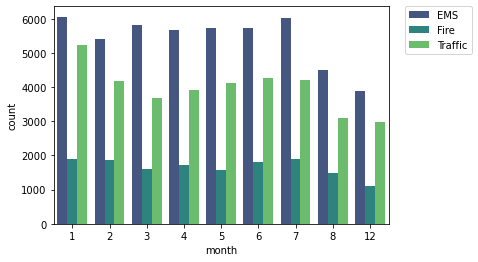

In [21]:
sns.countplot(x='month',data=df, hue= 'reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**There are some missing months in the countplot.**

**Creating a gropuby object called byMonth, where the DataFrame is grouped by the month column and use the count() method for aggregation**

In [22]:
bymonth = df.groupby('month').count()
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Creating a simple plot off of the dataframe indicating the count of calls per month**

<AxesSubplot:xlabel='month'>

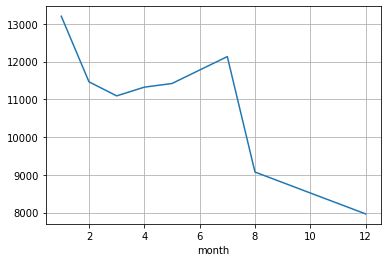

In [23]:
bymonth['twp'].plot(grid=True)

 **Using seaborn's lmplot() to create a linear fit on the number of calls per month.**

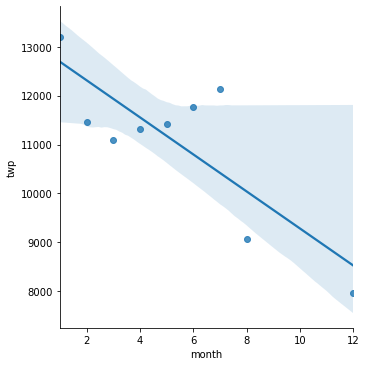

In [24]:
sns.lmplot(x='month',y='twp',data=bymonth.reset_index())

**Creating a new column called 'Date' that contains the date from the timeStamp column.**

In [25]:
df['date'] = df['timeStamp'].apply(lambda time: time.date())

**Now I have used groupby on this Date column with the count() and created a plot of counts of 911 calls**

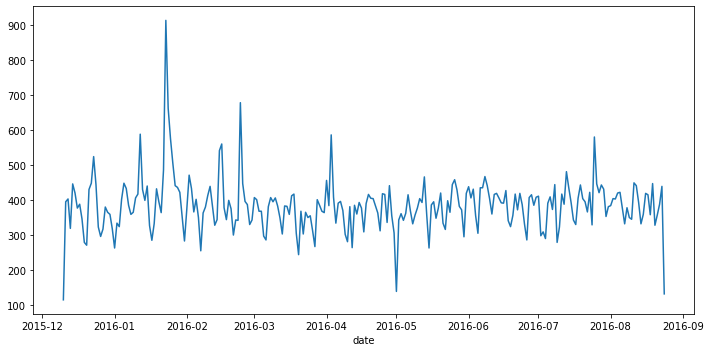

In [26]:
plt.figure(figsize=(10,5))
bydate = df.groupby('date').count()
bydate['twp'].plot()
plt.tight_layout()

**Creating 3 separate plots with each plot representing a Reason for the 911 call**

Text(0.5, 1.0, 'Traffic')

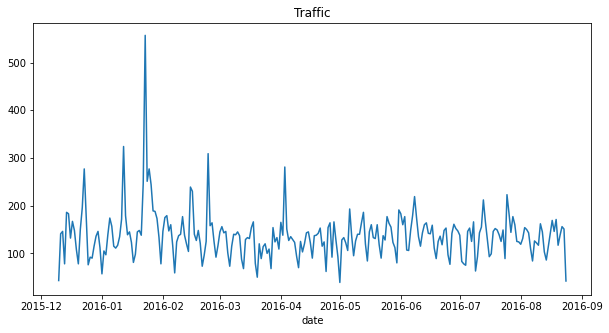

In [27]:
plt.figure(figsize=(10,5))
df[df['reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

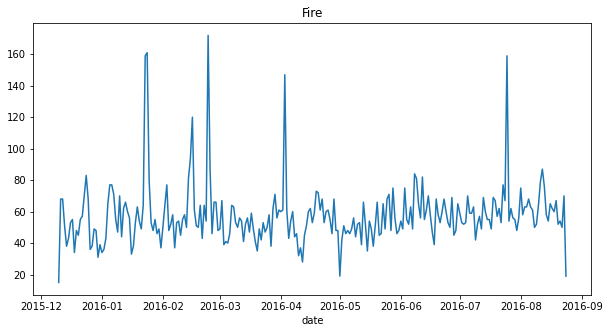

In [28]:
plt.figure(figsize=(10,5))
df[df['reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

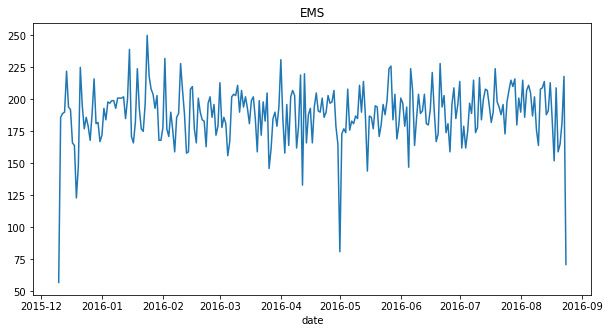

In [29]:
plt.figure(figsize=(10,5))
df[df['reason']=='EMS'].groupby('date').count()['twp'].plot()
plt.title('EMS')

**Restructuring the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [30]:
dayhour = df.groupby(by=['day of week','hour']).count()['reason'].unstack()
dayhour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**Creating Heatmaps**

<AxesSubplot:xlabel='hour', ylabel='day of week'>

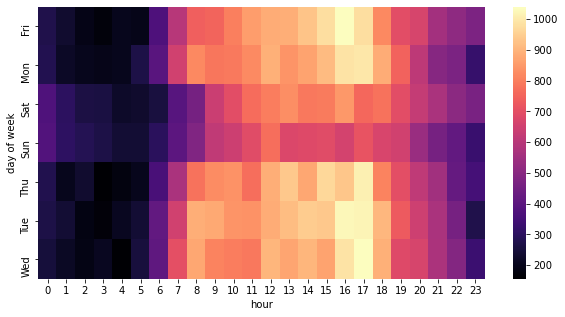

In [43]:
plt.figure(figsize=(10,5))
sns.heatmap(data=dayhour, cmap='magma')

**Creating Clustermap**

<Figure size 864x432 with 0 Axes>

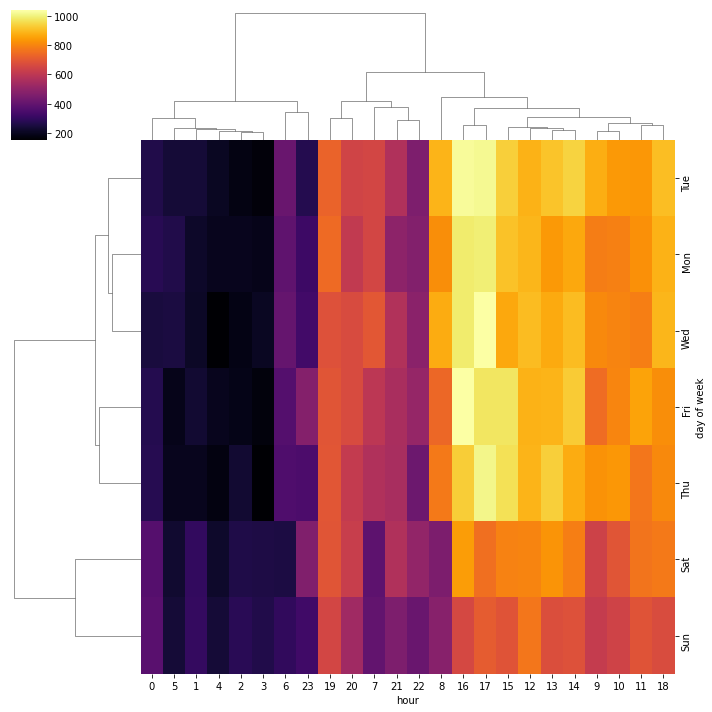

In [42]:
plt.figure(figsize=(12,6))
sns.clustermap(dayhour, cmap='inferno')

**Restructuring the dataframe so that the columns become the Months and the Index becomes the Day of Week.**

In [33]:
daymonth = df.groupby(by = ['day of week','month']).count()['reason'].unstack()
daymonth.head()

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


**Creating Heatmap**

<AxesSubplot:xlabel='month', ylabel='day of week'>

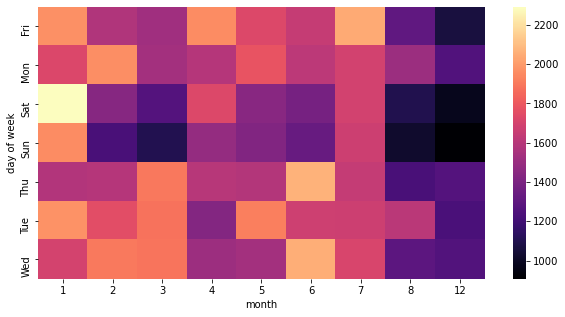

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(data = daymonth,cmap='magma')

**Creating Clustermap**

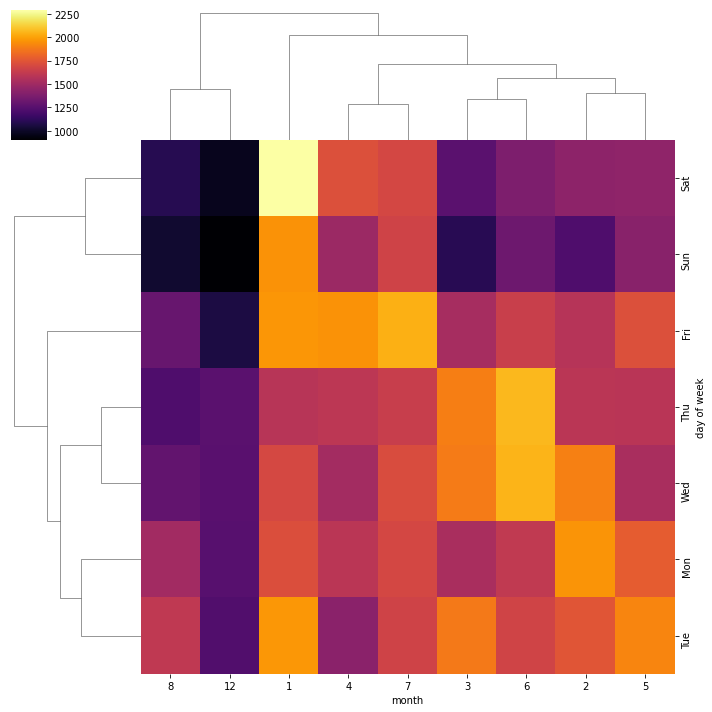

In [40]:
sns.clustermap(daymonth, cmap='inferno')